In [1]:
from arch.unitroot import ADF, PhillipsPerron
import currencies_lib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import statsmodels.stats.diagnostic as smd
import warnings

## Read datasets

### Currencies

In [2]:
currencies = currencies_lib.read_from_file()
currencies

,BTC,ETH,BNB,SOL,XRP,ADA,AVAX,DOGE,TRX,LINK,DOT,MATIC,ICP,SHIB,BCH,LTC,ATOM,ETC
0,Bitcoin,Ethereum,Binance Coin,Solana,Ripple,Cardano,Avalanche,Dogecoin,TRON,Chainlink,Polkadot,Polygon,Internet Computer,Shiba Inu,Bitcoin Cash,Litecoin,Cosmos,Ethereum Classic


### Prices

In [3]:
interval = "1h"
prices = pd.read_csv(f"output/prices-{interval}.csv", parse_dates=["Date"]).set_index("Date")
prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2904 entries, 2024-01-01 00:00:00 to 2024-04-30 23:00:00
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     2904 non-null   float64
 1   ETH     2904 non-null   float64
 2   BNB     2904 non-null   float64
 3   SOL     2904 non-null   float64
 4   XRP     2904 non-null   float64
 5   ADA     2904 non-null   float64
 6   AVAX    2904 non-null   float64
 7   DOGE    2904 non-null   float64
 8   TRX     2904 non-null   float64
 9   LINK    2904 non-null   float64
 10  DOT     2904 non-null   float64
 11  MATIC   2904 non-null   float64
 12  ICP     2904 non-null   float64
 13  SHIB    2904 non-null   float64
 14  BCH     2904 non-null   float64
 15  LTC     2904 non-null   float64
 16  ATOM    2904 non-null   float64
 17  ETC     2904 non-null   float64
dtypes: float64(18)
memory usage: 431.1 KB


In [4]:
panel_1, panel_2, panel_3 = prices.columns[:6], prices.columns[6:12], prices.columns[12:]
panel_1, panel_2, panel_3

(Index(['BTC', 'ETH', 'BNB', 'SOL', 'XRP', 'ADA'], dtype='object'),
 Index(['AVAX', 'DOGE', 'TRX', 'LINK', 'DOT', 'MATIC'], dtype='object'),
 Index(['ICP', 'SHIB', 'BCH', 'LTC', 'ATOM', 'ETC'], dtype='object'))

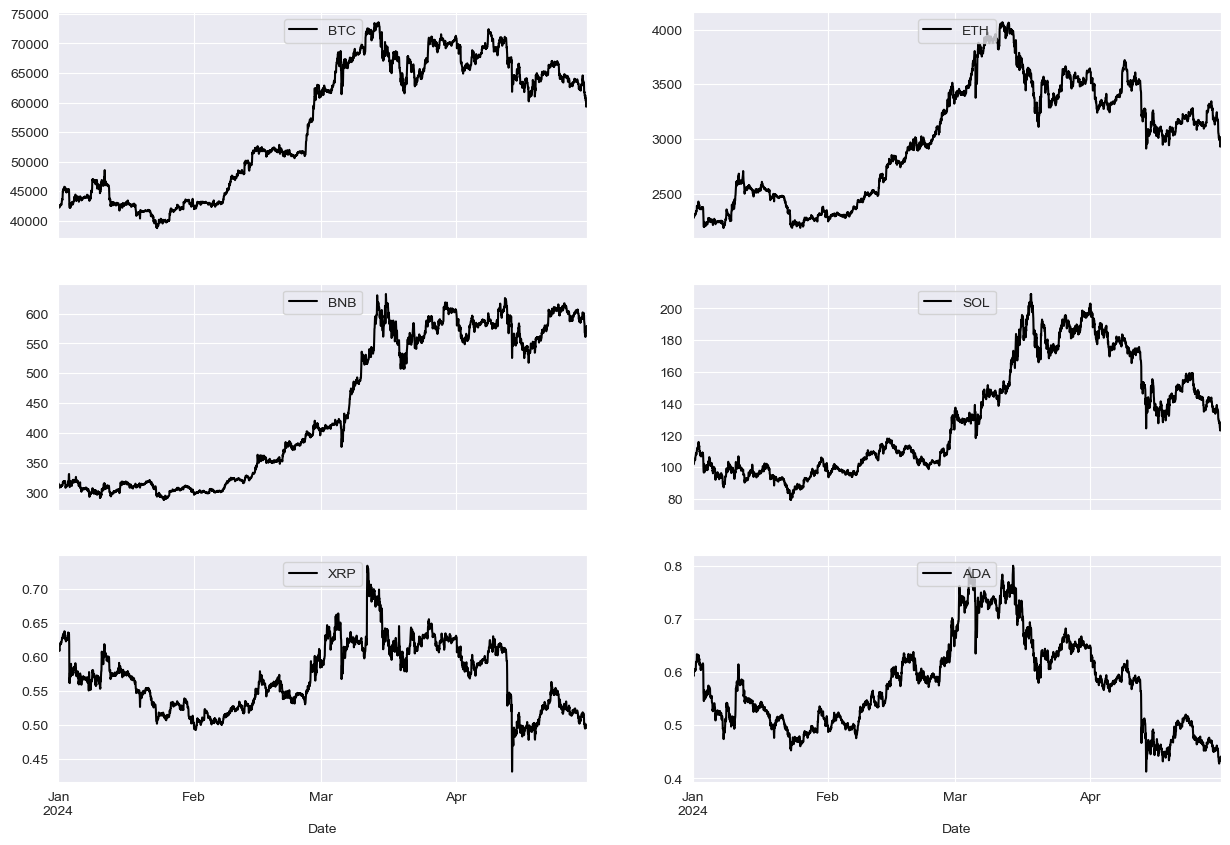

In [5]:
axes = prices[panel_1].plot.line(subplots=True, sharex=True, sharey=False, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper center")
plt.savefig("output/step_02_Prices_of_Cryptocurrencies_panel_1.png", bbox_inches='tight')
plt.show()

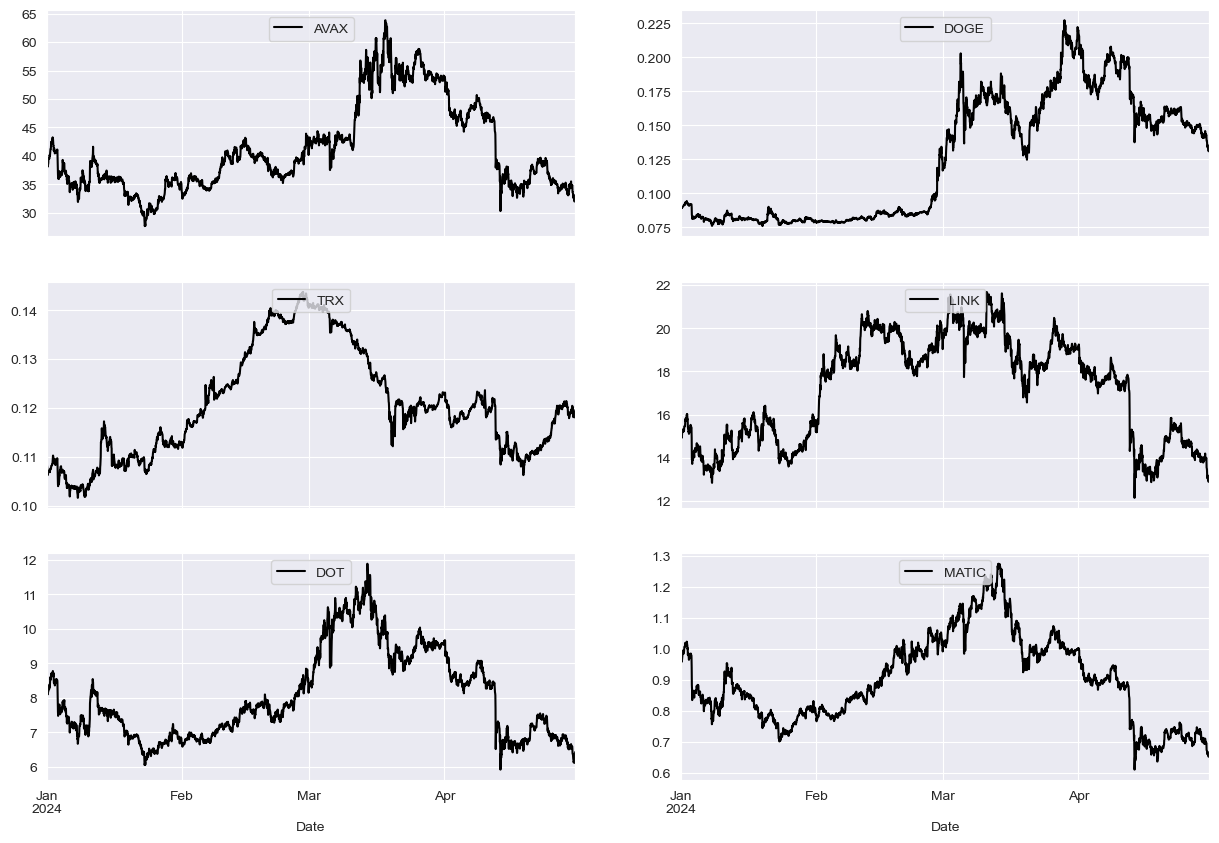

In [6]:
axes = prices[panel_2].plot.line(subplots=True, sharex=True, sharey=False, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper center")
plt.savefig("output/step_02_Prices_of_Cryptocurrencies_panel_2.png", bbox_inches='tight')
plt.show()

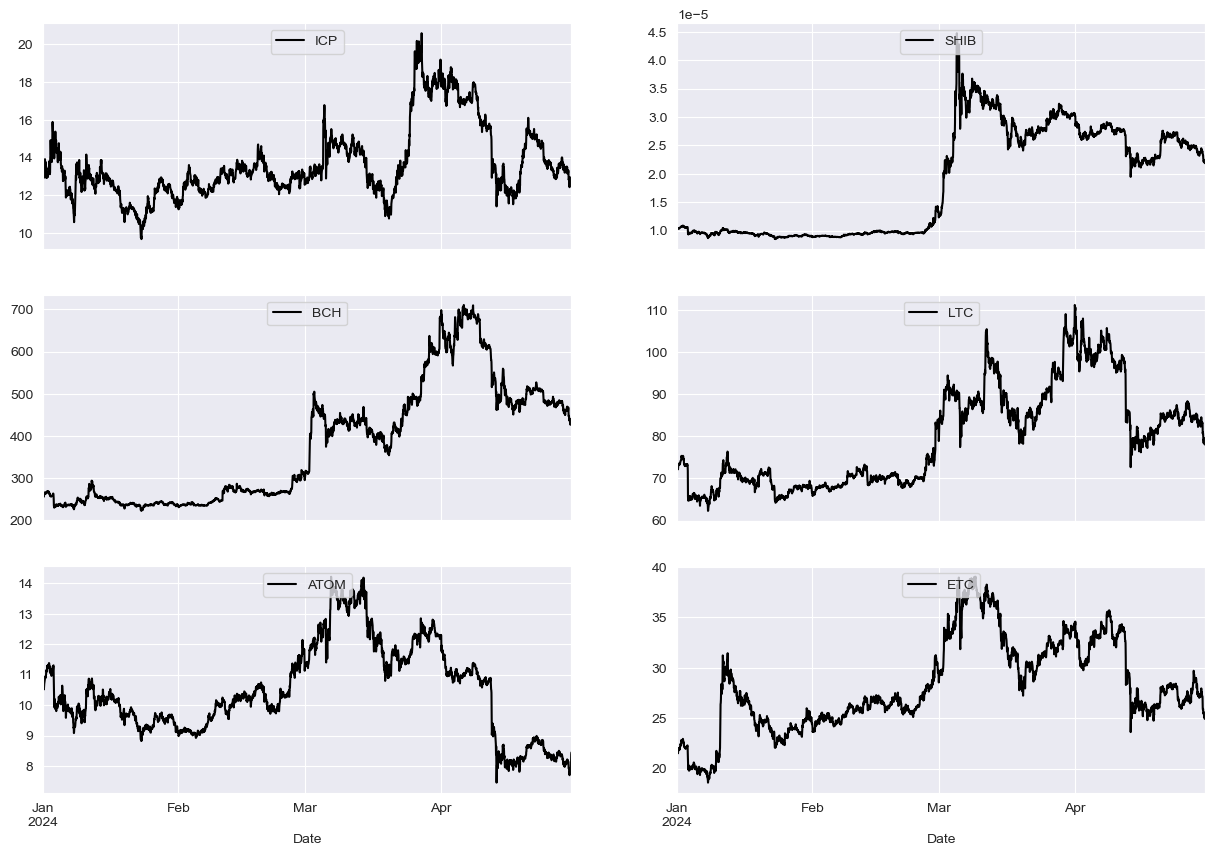

In [7]:
axes = prices[panel_3].plot.line(subplots=True, sharex=True, sharey=False, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper center")
plt.savefig("output/step_02_Prices_of_Cryptocurrencies_panel_3.png", bbox_inches='tight')
plt.show()

In [8]:
# prices.plot.line(subplots=True, sharex=True, sharey=False, figsize=(15, 10), layout=(6, 3))
# plt.show()
# plt.savefig("output/step_02_Prices_of_Cryptocurrencies.png")

## Data Transformation 

### Arithmetic Returns

In [9]:
returns = prices.pct_change().dropna()
returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2903 entries, 2024-01-01 01:00:00 to 2024-04-30 23:00:00
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     2903 non-null   float64
 1   ETH     2903 non-null   float64
 2   BNB     2903 non-null   float64
 3   SOL     2903 non-null   float64
 4   XRP     2903 non-null   float64
 5   ADA     2903 non-null   float64
 6   AVAX    2903 non-null   float64
 7   DOGE    2903 non-null   float64
 8   TRX     2903 non-null   float64
 9   LINK    2903 non-null   float64
 10  DOT     2903 non-null   float64
 11  MATIC   2903 non-null   float64
 12  ICP     2903 non-null   float64
 13  SHIB    2903 non-null   float64
 14  BCH     2903 non-null   float64
 15  LTC     2903 non-null   float64
 16  ATOM    2903 non-null   float64
 17  ETC     2903 non-null   float64
dtypes: float64(18)
memory usage: 430.9 KB


In [10]:
returns_dataset_summary = returns.describe().transpose()
returns_dataset_summary.to_csv("output/step_02_Statistics_of_Arithmetic_Returns.csv")
returns_dataset_summary

,count,mean,std,min,25%,50%,75%,max
BTC,2903.0,1.410827e-04,0.006038,-0.045873,-0.002508,0.000117,0.002820,0.041096
ETH,2903.0,1.183102e-04,0.006991,-0.065179,-0.002856,0.000276,0.003246,0.039037
BNB,2903.0,2.369149e-04,0.007332,-0.066402,-0.003008,0.000324,0.003411,0.061089
SOL,2903.0,1.425346e-04,0.011617,-0.090465,-0.005857,0.000153,0.005798,0.072508
XRP,2903.0,-3.656457e-05,0.008332,-0.123017,-0.003143,0.000163,0.003378,0.116245
ADA,2903.0,-5.451085e-05,0.009968,-0.117436,-0.004552,0.000000,0.004645,0.056477
AVAX,2903.0,1.338892e-05,0.012111,-0.092051,-0.005470,0.000000,0.005728,0.088956
DOGE,2903.0,2.226407e-04,0.013190,-0.124111,-0.004427,0.000122,0.004645,0.184860
TRX,2903.0,4.146411e-05,0.003859,-0.032030,-0.001282,0.000256,0.001649,0.037693
LINK,2903.0,4.747545e-07,0.009871,-0.111490,-0.004849,0.000272,0.004875,0.051501


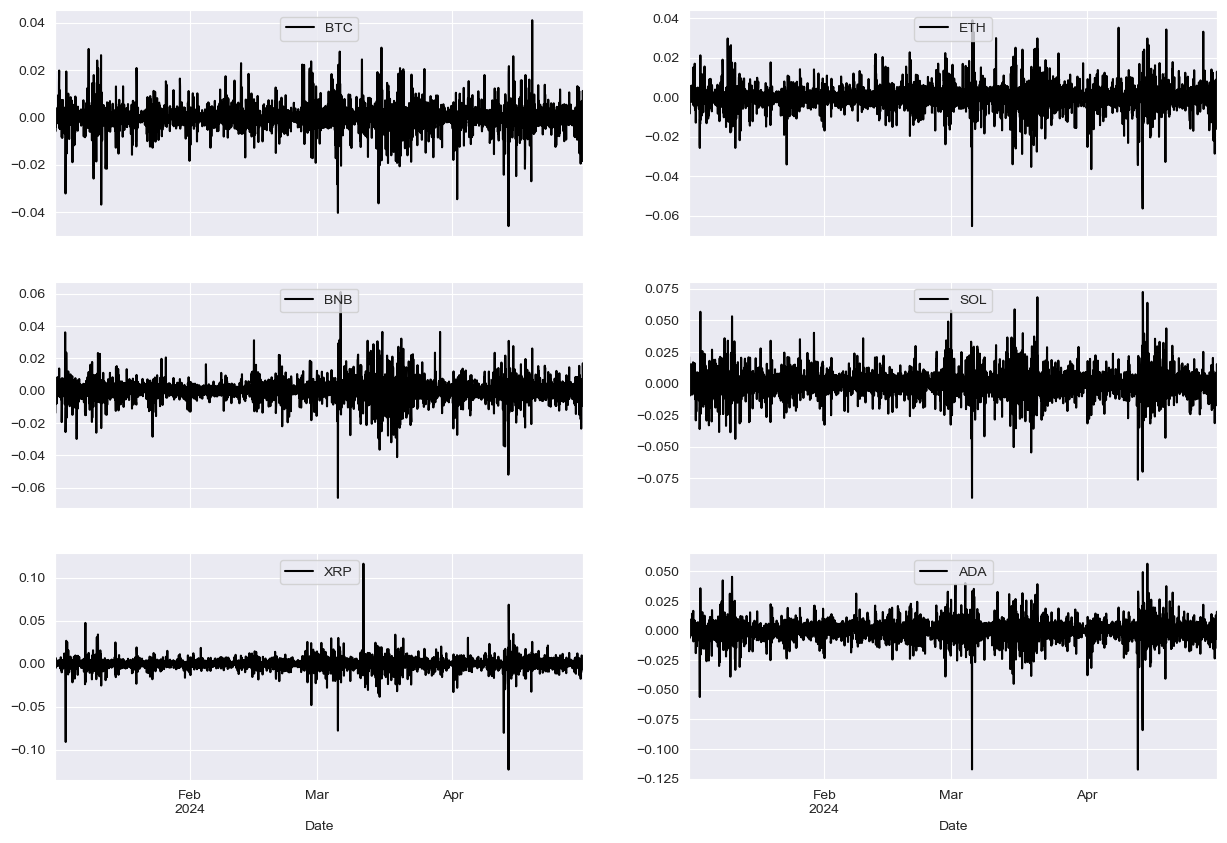

In [11]:
axes = returns[panel_1].plot.line(subplots=True, sharex=True, sharey=False, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper center")
plt.savefig("output/step_02_Returns_of_Cryptocurrencies_panel_1.png", bbox_inches='tight')
plt.show()

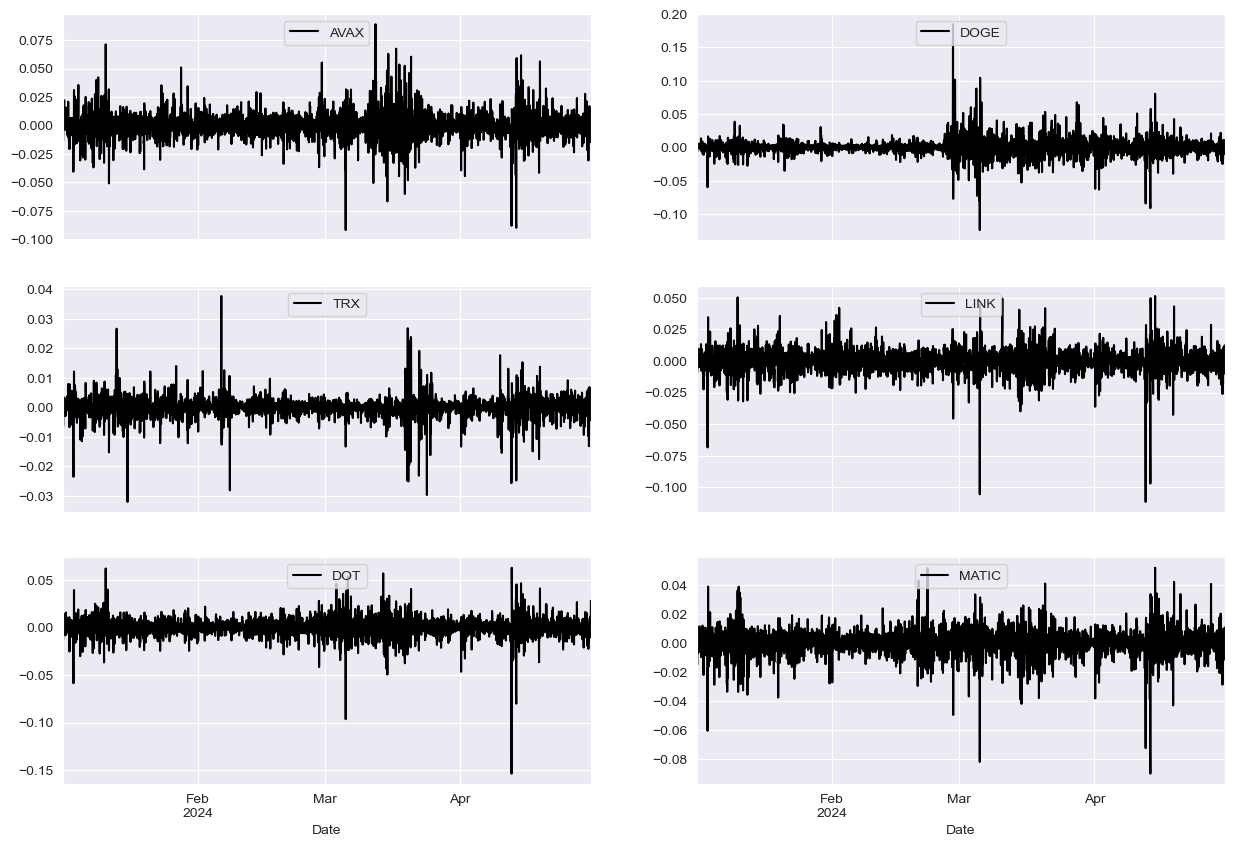

In [12]:
axes = returns[panel_2].plot.line(subplots=True, sharex=True, sharey=False, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper center")
plt.savefig("output/step_02_Returns_of_Cryptocurrencies_panel_2.png", bbox_inches='tight')
plt.show()

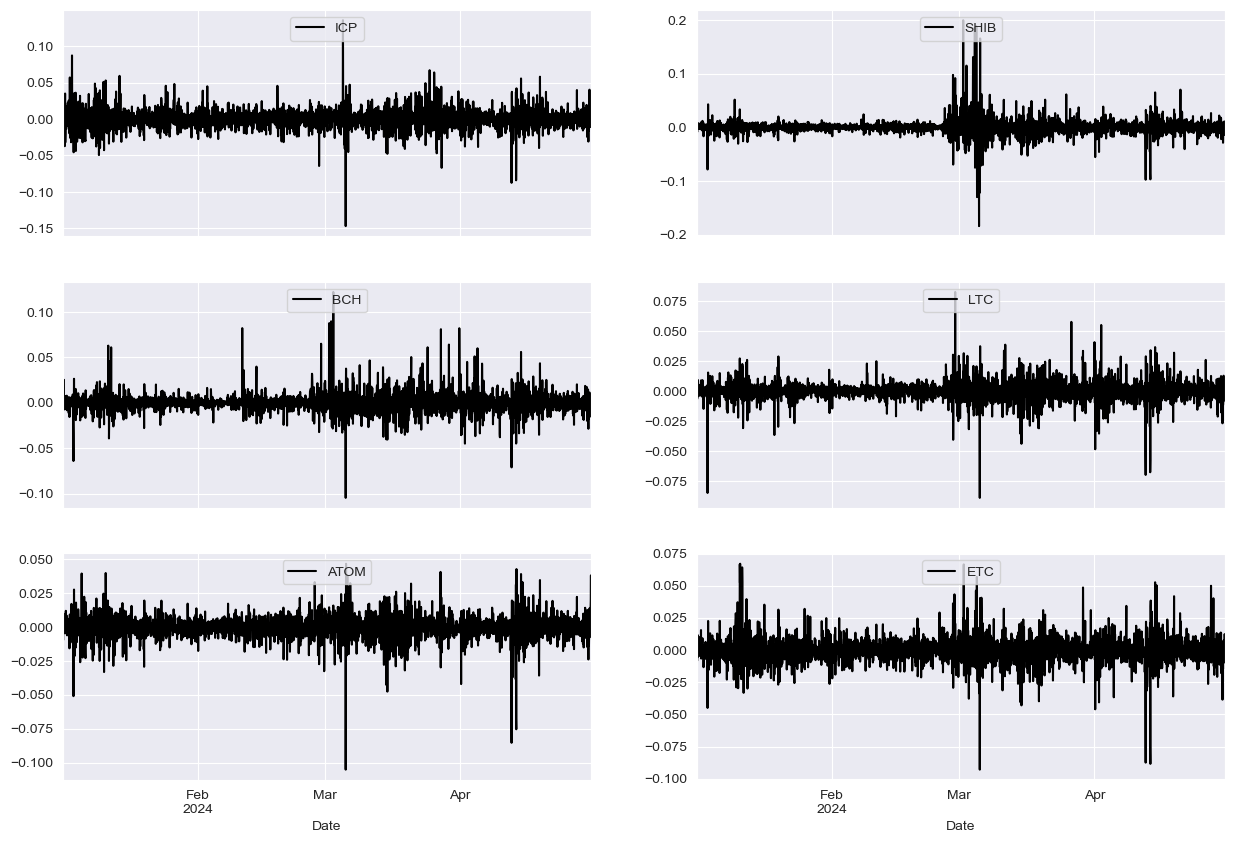

In [13]:
axes = returns[panel_3].plot.line(subplots=True, sharex=True, sharey=False, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper center")
plt.savefig("output/step_02_Returns_of_Cryptocurrencies_panel_3.png", bbox_inches='tight')
plt.show()

In [14]:
# returns.plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(6, 3))
# plt.show()
# plt.savefig("output/step_02_Returns_of_Cryptocurrencies.png")

##### Distribution of Arithmetic Returns

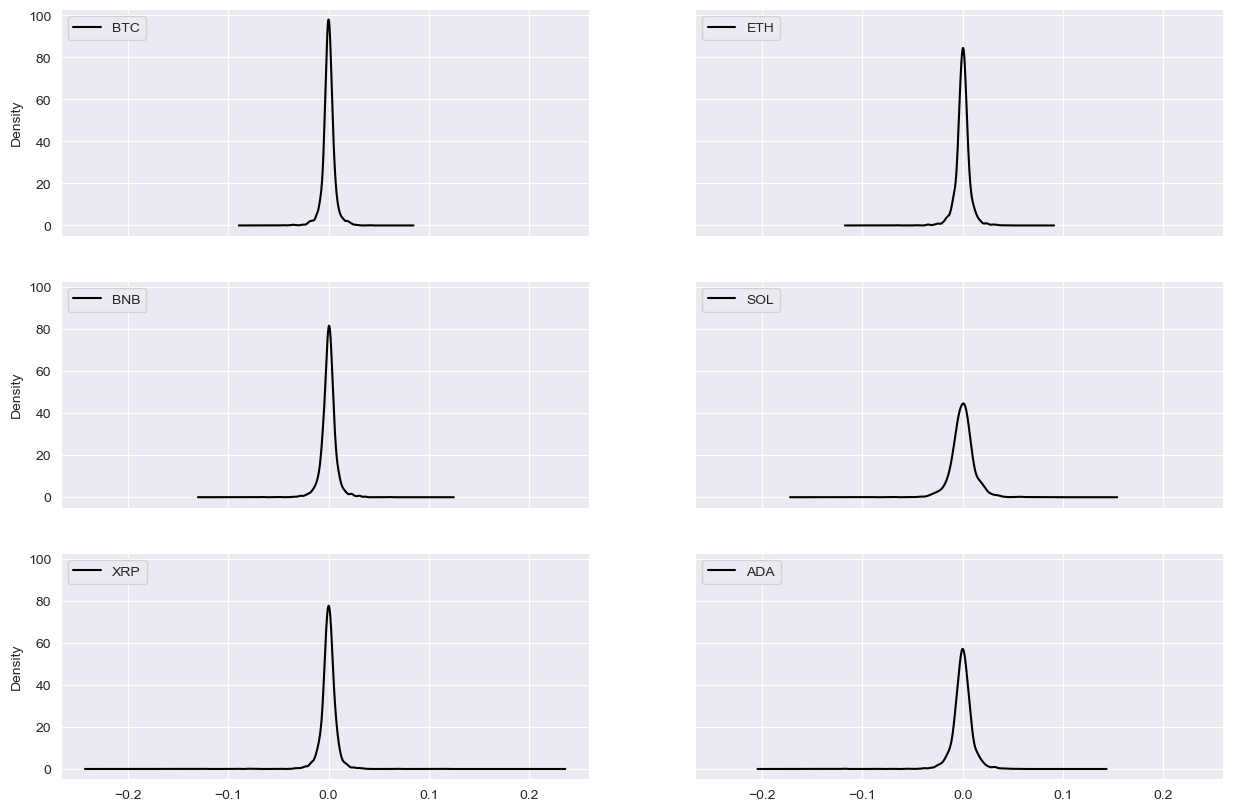

In [15]:
axes = returns[panel_1].plot.kde(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper left")
plt.savefig("output/step_02_Distribution_of_Cryptocurrencies_Returns_panel_1.png", bbox_inches='tight')
plt.show()

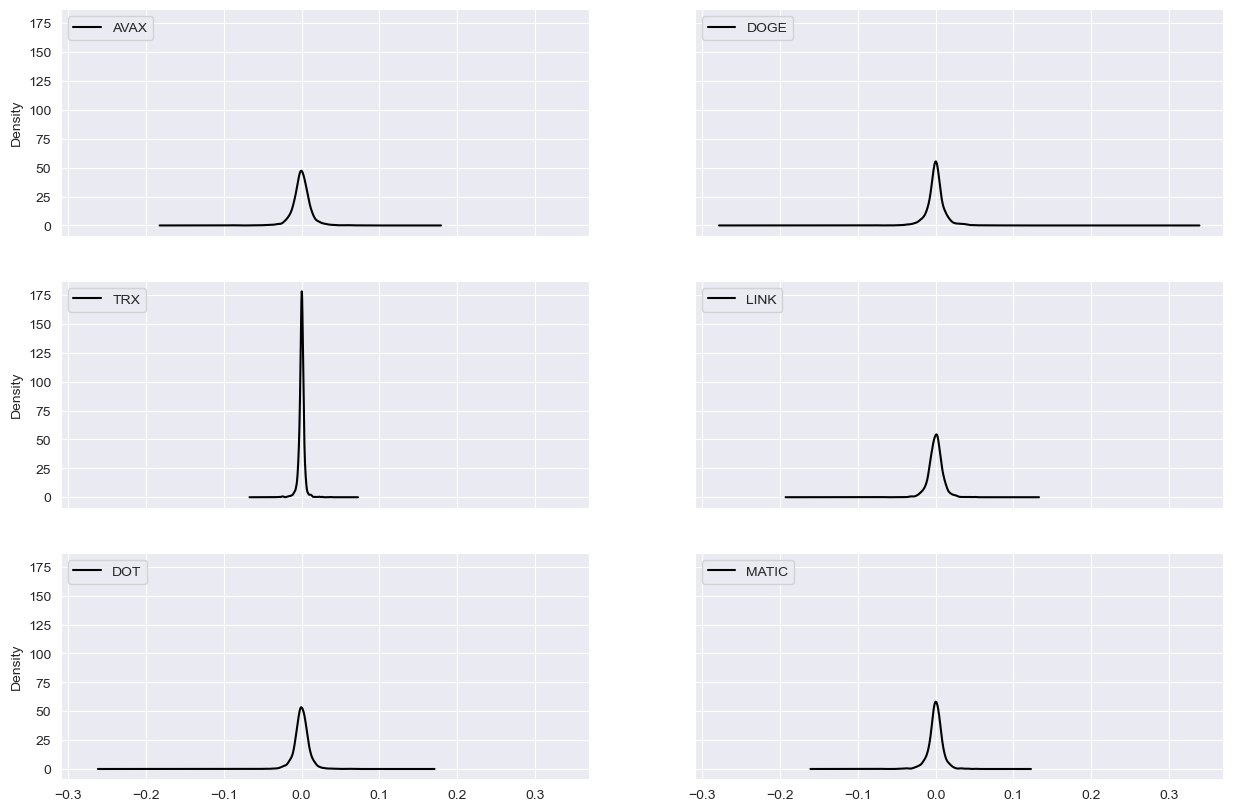

In [16]:
axes = returns[panel_2].plot.kde(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper left")
plt.savefig("output/step_02_Distribution_of_Cryptocurrencies_Returns_panel_2.png", bbox_inches='tight')
plt.show()

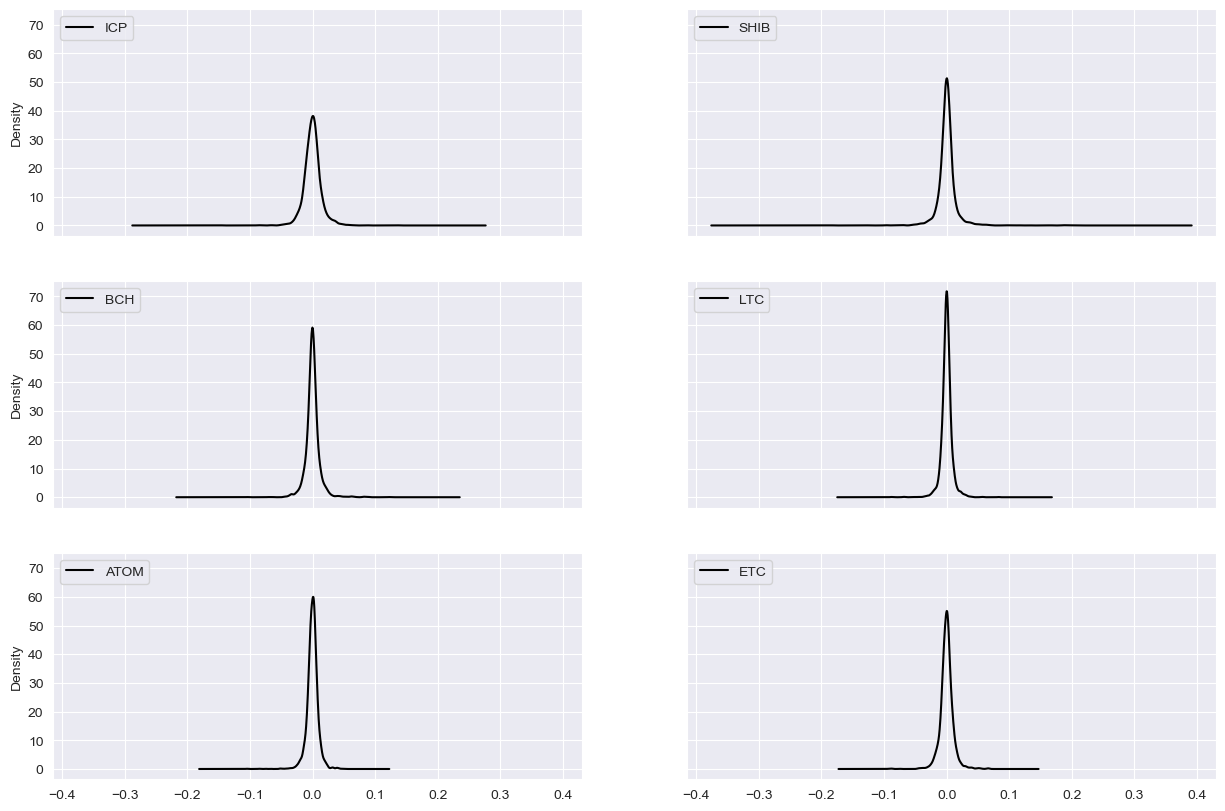

In [17]:
axes = returns[panel_3].plot.kde(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper left")
plt.savefig("output/step_02_Distribution_of_Cryptocurrencies_Returns_panel_3.png", bbox_inches='tight')
plt.show()

### Log Returns

In [18]:
log_returns = np.log1p(returns)
log_returns.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2903 entries, 2024-01-01 01:00:00 to 2024-04-30 23:00:00
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC     2903 non-null   float64
 1   ETH     2903 non-null   float64
 2   BNB     2903 non-null   float64
 3   SOL     2903 non-null   float64
 4   XRP     2903 non-null   float64
 5   ADA     2903 non-null   float64
 6   AVAX    2903 non-null   float64
 7   DOGE    2903 non-null   float64
 8   TRX     2903 non-null   float64
 9   LINK    2903 non-null   float64
 10  DOT     2903 non-null   float64
 11  MATIC   2903 non-null   float64
 12  ICP     2903 non-null   float64
 13  SHIB    2903 non-null   float64
 14  BCH     2903 non-null   float64
 15  LTC     2903 non-null   float64
 16  ATOM    2903 non-null   float64
 17  ETC     2903 non-null   float64
dtypes: float64(18)
memory usage: 430.9 KB


In [19]:
log_returns_dataset_summary = log_returns.describe().transpose()
log_returns_dataset_summary.to_csv("output/step_02_Statistics_of_Log_Returns.csv")
log_returns_dataset_summary

,count,mean,std,min,25%,50%,75%,max
BTC,2903.0,0.000123,0.006045,-0.046958,-0.002511,0.000117,0.002816,0.040274
ETH,2903.0,0.000094,0.007006,-0.067401,-0.002860,0.000276,0.003241,0.038294
BNB,2903.0,0.000210,0.007339,-0.068710,-0.003013,0.000324,0.003405,0.059296
SOL,2903.0,0.000075,0.011625,-0.094822,-0.005874,0.000153,0.005781,0.070000
XRP,2903.0,-0.000072,0.008389,-0.131268,-0.003147,0.000163,0.003373,0.109971
ADA,2903.0,-0.000105,0.010047,-0.124924,-0.004563,0.000000,0.004634,0.054940
AVAX,2903.0,-0.000060,0.012129,-0.096567,-0.005485,0.000000,0.005711,0.085220
DOGE,2903.0,0.000136,0.013136,-0.132516,-0.004437,0.000122,0.004634,0.169624
TRX,2903.0,0.000034,0.003863,-0.032554,-0.001283,0.000256,0.001647,0.037000
LINK,2903.0,-0.000049,0.009942,-0.118210,-0.004861,0.000272,0.004863,0.050219


In [20]:
# log_returns.plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(6, 3))
# plt.show()
# plt.savefig("output/step_02_Log_Returns_of_Cryptocurrencies.png")

In [21]:
# log_returns.plot.kde(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(6, 3))
# plt.show()
# plt.savefig("output/step_02_Distribution_of_Cryptocurrencies_Log_Returns.png")

### Squared Returns

In [22]:
squared_returns = returns ** 2
norm_squared_returns = (squared_returns / squared_returns.max())
squared_returns

,BTC,ETH,BNB,SOL,XRP,ADA,AVAX,DOGE,TRX,LINK,DOT,MATIC,ICP,SHIB,BCH,LTC,ATOM,ETC
Date,,,,,,,,,,,,,,,,,,
2024-01-01 01:00:00,1.060624e-05,0.000013,0.000008,0.000449,0.000014,5.415621e-05,0.000134,1.349538e-05,0.000001,8.855367e-06,1.066674e-05,0.000068,0.000133,1.484996e-05,0.000007,1.468780e-05,0.000005,0.000067
2024-01-01 02:00:00,5.802316e-07,0.000022,0.000195,0.000017,0.000025,2.161177e-05,0.000079,1.594326e-05,0.000013,4.522733e-05,2.443654e-05,0.000072,0.000251,8.289094e-06,0.000005,6.023698e-06,0.000021,0.000059
2024-01-01 03:00:00,3.463882e-05,0.000070,0.000030,0.000036,0.000015,4.232050e-05,0.000184,4.316695e-05,0.000042,7.911728e-05,1.618657e-04,0.000230,0.000146,7.503328e-05,0.000043,4.485850e-05,0.000093,0.000067
2024-01-01 04:00:00,2.695647e-06,0.000006,0.000000,0.000019,0.000005,2.537074e-07,0.000061,1.520402e-06,0.000028,5.427597e-07,9.640020e-07,0.000004,0.000885,9.425959e-07,0.000018,3.711468e-06,0.000011,0.000026
2024-01-01 05:00:00,1.532428e-05,0.000003,0.000003,0.000091,0.000022,2.889537e-05,0.000007,1.259635e-06,0.000006,1.782968e-05,3.056161e-05,0.000053,0.000411,9.444289e-07,0.000026,2.328631e-05,0.000003,0.000031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30 19:00:00,3.381291e-04,0.000254,0.000059,0.000089,0.000004,4.434245e-05,0.000219,9.978822e-05,0.000003,9.825571e-05,5.580027e-05,0.000133,0.000115,1.949923e-04,0.000079,3.139310e-05,0.000047,0.000091
2024-04-30 20:00:00,1.260410e-04,0.000169,0.000286,0.000238,0.000059,2.544047e-04,0.000156,1.064926e-04,0.000038,1.541953e-04,1.426524e-04,0.000112,0.000004,1.202073e-04,0.000012,1.075918e-04,0.000195,0.000155
2024-04-30 21:00:00,1.363244e-05,0.000049,0.000012,0.000035,0.000027,2.536754e-06,0.000008,1.465461e-06,0.000002,9.402250e-08,3.202261e-05,0.000008,0.000113,8.167651e-05,0.000012,5.782937e-07,0.000373,0.000010


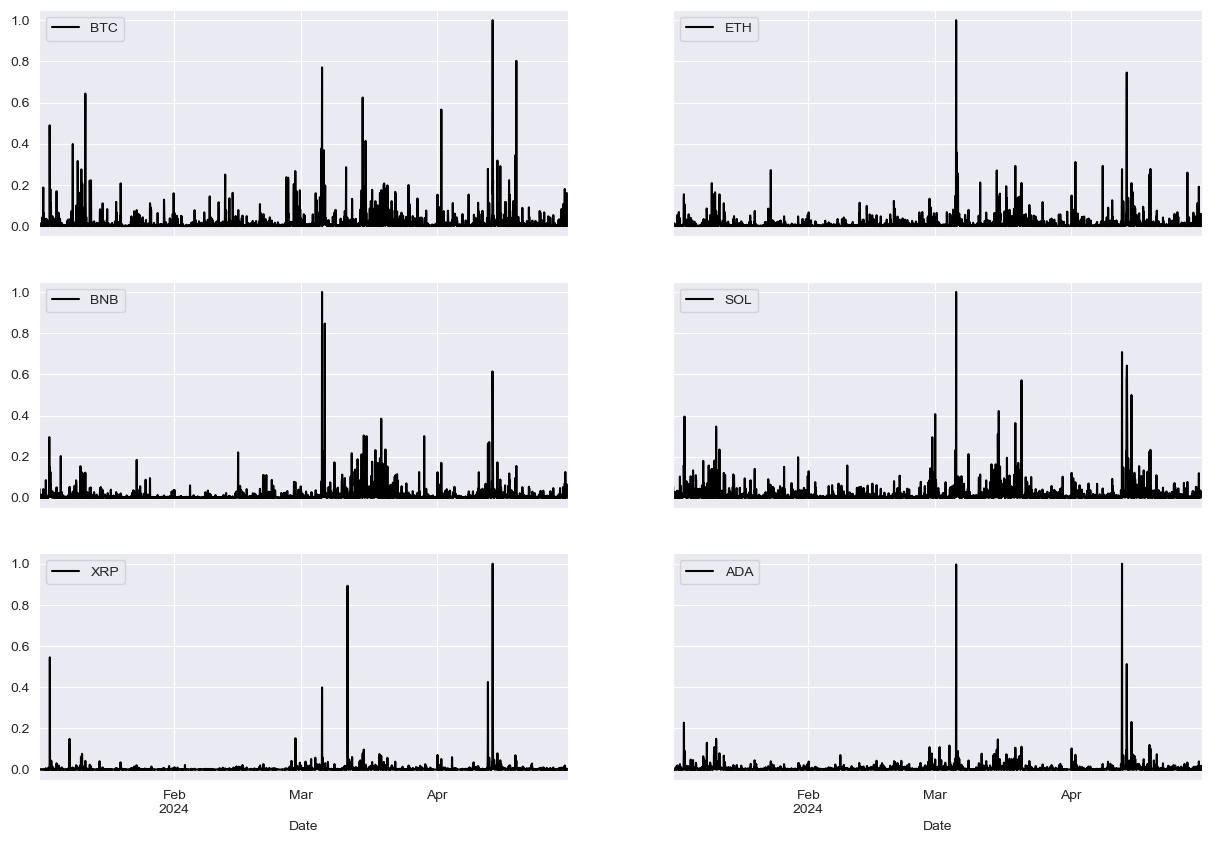

In [23]:
axes = norm_squared_returns[panel_1].plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper left")
plt.savefig("output/step_02_Volatility_of_Cryptocurrencies_panel_1.png", bbox_inches='tight')
plt.show()

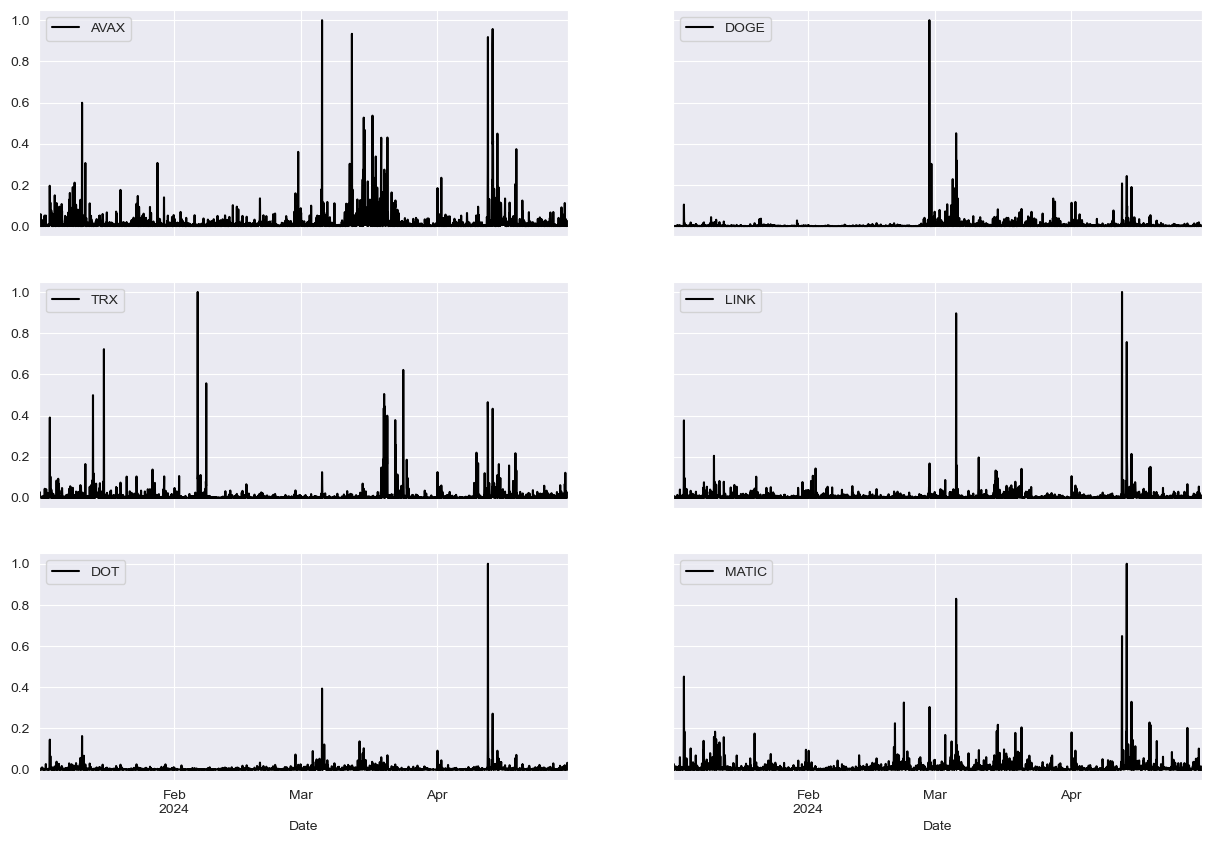

In [24]:
axes = norm_squared_returns[panel_2].plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper left")
plt.savefig("output/step_02_Volatility_of_Cryptocurrencies_panel_2.png", bbox_inches='tight')
plt.show()

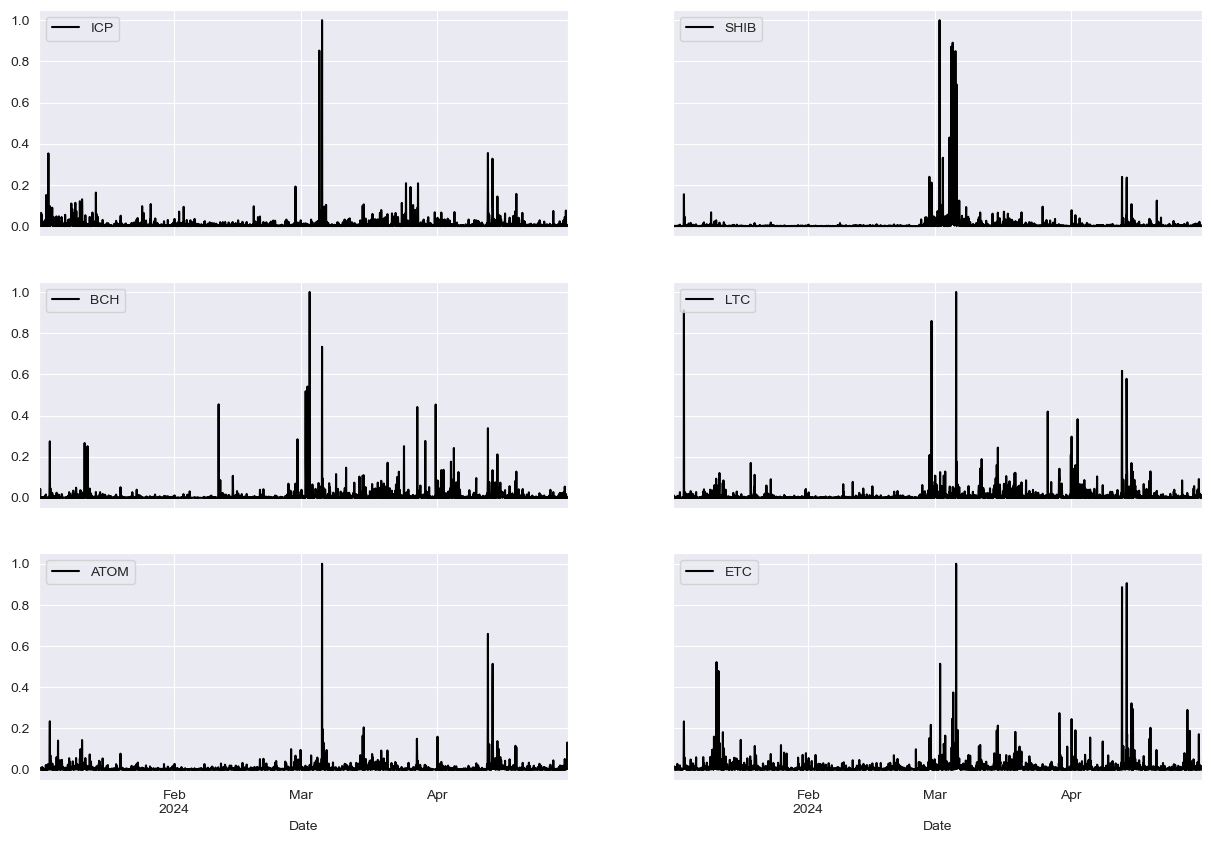

In [25]:
axes = norm_squared_returns[panel_3].plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper left")
plt.savefig("output/step_02_Volatility_of_Cryptocurrencies_panel_3.png", bbox_inches='tight')
plt.show()

In [26]:
# (squred_returns / squred_returns.max()).plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(6, 3))
# plt.show()
# plt.savefig("output/step_02_Volatility_of_Cryptocurrencies.png")

### Cumulative Returns

In [27]:
cumprod_returns = prices / prices.iloc[0]
cumprod_returns

,BTC,ETH,BNB,SOL,XRP,ADA,AVAX,DOGE,TRX,LINK,DOT,MATIC,ICP,SHIB,BCH,LTC,ATOM,ETC
Date,,,,,,,,,,,,,,,,,,
2024-01-01 00:00:00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2024-01-01 01:00:00,1.003257,1.003577,1.002863,1.021185,1.003733,1.007359,1.011556,1.003674,0.998892,1.002976,1.003266,1.008240,0.988450,1.003854,1.002693,1.003832,1.002243,1.008208
2024-01-01 02:00:00,1.002493,0.998915,0.988868,1.016967,0.998702,1.002676,1.002568,0.999666,0.995292,0.996231,0.998307,0.999695,0.972786,1.000963,1.000385,1.001369,0.997663,1.000456
2024-01-01 03:00:00,0.996592,0.990547,0.983461,1.010887,0.994807,0.996153,0.988957,0.993098,0.988829,0.987369,0.985605,0.984537,0.961019,0.992293,0.993844,0.994662,0.988035,0.992248
2024-01-01 04:00:00,0.998229,0.993047,0.983461,1.006473,0.992535,0.995651,0.981253,0.991874,0.983567,0.986642,0.984638,0.982503,0.932433,0.991329,0.989611,0.992746,0.984764,0.987232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30 19:00:00,1.395942,1.275952,1.804071,1.206748,0.804933,0.723532,0.821520,1.456306,1.090196,0.852070,0.739325,0.663683,0.912510,2.108863,1.655637,1.068848,0.730136,1.137255
2024-04-30 20:00:00,1.411614,1.292528,1.834606,1.225383,0.811100,0.735073,0.831793,1.471335,1.096935,0.862650,0.748155,0.670702,0.910705,2.131985,1.661408,1.079934,0.740325,1.151391
2024-04-30 21:00:00,1.416826,1.301615,1.840967,1.232640,0.806881,0.733902,0.834104,1.473116,1.098412,0.862386,0.752389,0.672635,0.920378,2.151252,1.655637,1.080756,0.754627,1.155039


In [28]:
# cumprod_returns.plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(6, 3))
# plt.show()
# plt.savefig("output/step_02_Nomalised_Returns_Cryptocurrencies.png")

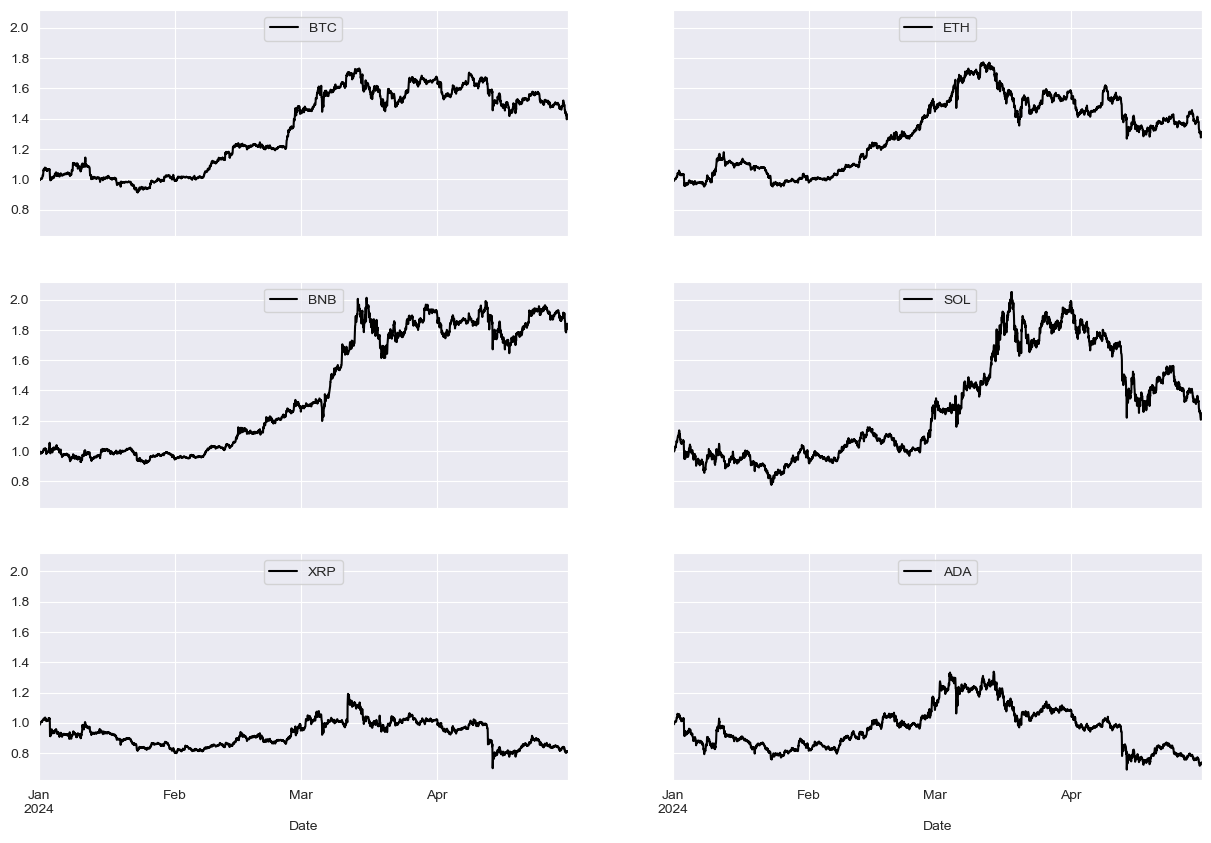

In [29]:
axes = cumprod_returns[panel_1].plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper center")
plt.savefig("output/step_02_Nomalised_Returns_Cryptocurrencies_panel_1.png", bbox_inches='tight')
plt.show()

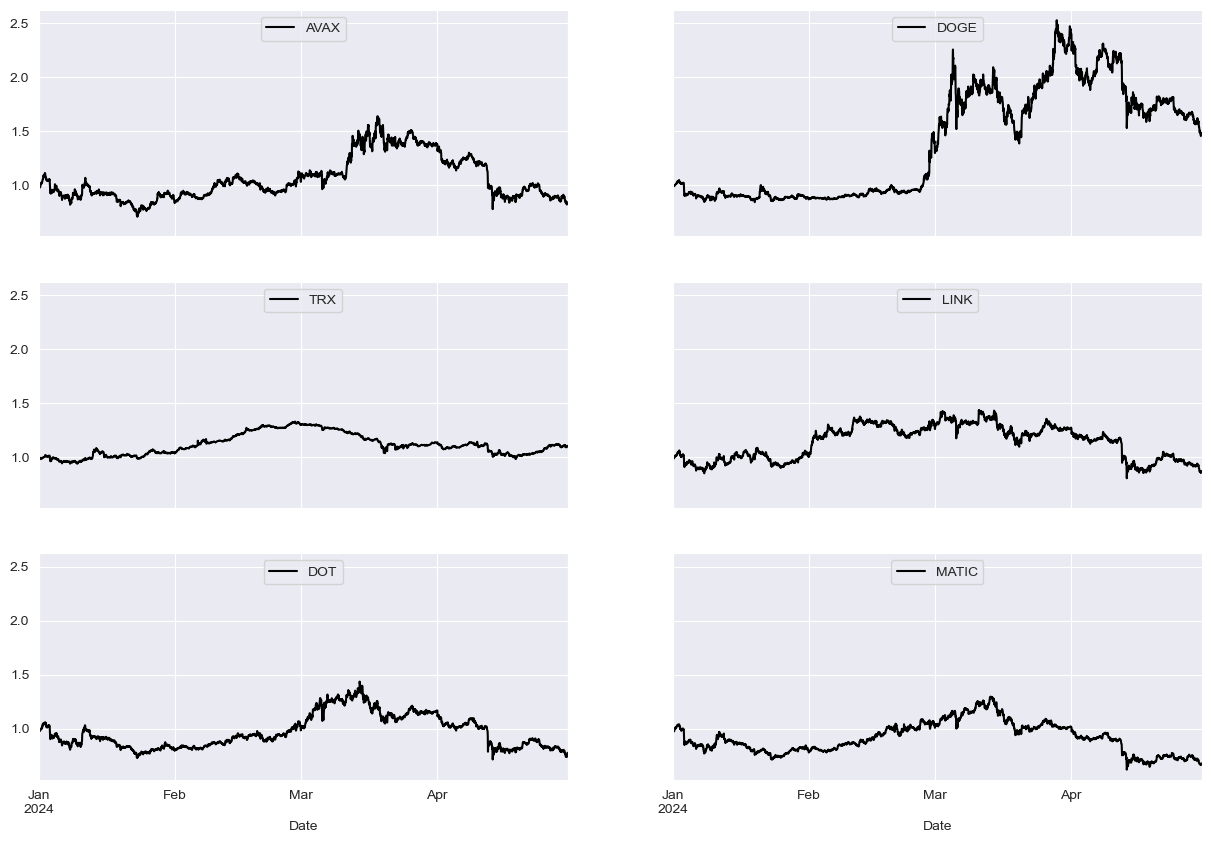

In [30]:
axes = cumprod_returns[panel_2].plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper center")
plt.savefig("output/step_02_Nomalised_Returns_Cryptocurrencies_panel_2.png", bbox_inches='tight')
plt.show()

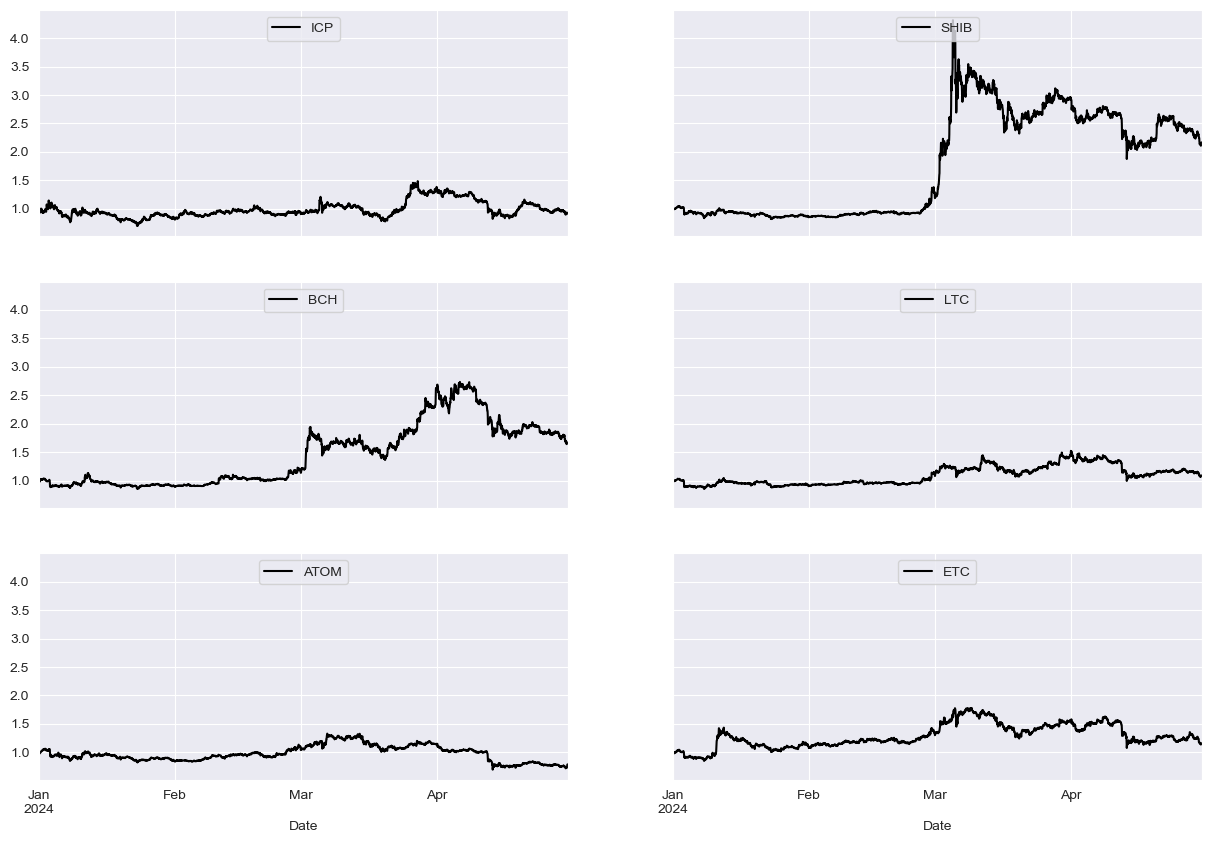

In [31]:
axes = cumprod_returns[panel_3].plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(3, 2), color="black")
for ax in axes.flatten():
    ax.legend(loc="upper center")
plt.savefig("output/step_02_Nomalised_Returns_Cryptocurrencies_panel_3.png", bbox_inches='tight')
plt.show()

## Descriptive Statistics

In [32]:
def get_descriptive_statistics(data_frame):
    jb_results = [scipy.stats.jarque_bera(data_frame[column], nan_policy="omit") for column in data_frame.columns]
    arch1_results = [smd.het_arch(data_frame[column].dropna(), nlags=1) for column in data_frame.columns]
    arch5_results = [smd.het_arch(data_frame[column].dropna(), nlags=5) for column in data_frame.columns]
    
    squared_returns = returns ** 2
    squared_residuals = squared_returns - squared_returns.mean()
    acorr_results = [smd.acorr_ljungbox(squared_residuals[column], lags=(1, 5), boxpierce=True) for column in data_frame.columns]
    
    return pd.DataFrame({
        "Observation": data_frame.count(),
        "Mean": data_frame.mean(),
        "Median": data_frame.median(),
        "Maximum": data_frame.max(),
        "Minimum": data_frame.min(),
        "Standard Deviation": data_frame.std(),
        "Skewness": data_frame.skew(),
        "Excess Kurtosis": data_frame.kurt(),
        "Jarque-Bera statistic": [result.statistic for result in jb_results],
        "Jarque-Bera p-value": [result.pvalue for result in jb_results],
        "ARCH(1) statistic": [result[2] for result in arch1_results],
        "ARCH(1) p-value": [result[3] for result in arch1_results],
        "ARCH(5) statistic": [result[2] for result in arch5_results],
        "ARCH(5) p-value": [result[3] for result in arch5_results],
        "Box-Pierce Q-test for ARCH(1)": [result["bp_stat"].iloc[0] for result in acorr_results],
        "Box-Pierce p-value for ARCH(1)": [result["bp_pvalue"].iloc[0] for result in acorr_results],
        "Ljung-Box Q-test for ARCH(1)": [result["lb_stat"].iloc[0] for result in acorr_results],
        "Ljung-Box p-value for ARCH(1)": [result["lb_pvalue"].iloc[0] for result in acorr_results],
        "Box-Pierce Q-test for ARCH(5)": [result["bp_stat"].iloc[1] for result in acorr_results],
        "Box-Pierce p-value for ARCH(5)": [result["bp_pvalue"].iloc[1] for result in acorr_results],
        "Ljung-Box Q-test for ARCH(5)": [result["lb_stat"].iloc[1] for result in acorr_results],
        "Ljung-Box p-value for ARCH(5)": [result["lb_pvalue"].iloc[1] for result in acorr_results],
    })

### Statistics of Arithmetic Returns

In [33]:
results = get_descriptive_statistics(returns)
results.to_csv("output/step_02_Descriptive_Statistics.csv")
results

,Observation,Mean,Median,Maximum,Minimum,Standard Deviation,Skewness,Excess Kurtosis,Jarque-Bera statistic,Jarque-Bera p-value,...,ARCH(5) statistic,ARCH(5) p-value,Box-Pierce Q-test for ARCH(1),Box-Pierce p-value for ARCH(1),Ljung-Box Q-test for ARCH(1),Ljung-Box p-value for ARCH(1),Box-Pierce Q-test for ARCH(5),Box-Pierce p-value for ARCH(5),Ljung-Box Q-test for ARCH(5),Ljung-Box p-value for ARCH(5)
BTC,2903,1.410827e-04,0.000117,0.041096,-0.045873,0.006038,-0.338750,7.054009,6050.009550,0.0,...,51.809155,1.323701e-51,216.402962,5.508306e-49,216.626673,4.922861e-49,318.865415,8.781412e-67,319.267345,7.196179e-67
ETH,2903,1.183102e-04,0.000276,0.039037,-0.065179,0.006991,-0.576147,8.435412,8733.556485,0.0,...,41.159769,4.862429e-41,127.494021,1.448366e-29,127.625820,1.355306e-29,273.647519,4.608449e-57,274.006884,3.858055e-57
BNB,2903,2.369149e-04,0.000324,0.061089,-0.066402,0.007332,-0.263644,8.806049,9376.828787,0.0,...,36.073062,6.086647e-36,119.877993,6.727362e-28,120.001919,6.319952e-28,237.331365,2.867335e-49,237.638983,2.463297e-49
SOL,2903,1.425346e-04,0.000153,0.072508,-0.090465,0.011617,-0.044894,5.670653,3874.337264,0.0,...,61.707631,2.740157e-61,179.575626,5.999003e-41,179.761265,5.464444e-41,457.739894,1.051078e-96,458.399724,7.573369e-97
XRP,2903,-3.656457e-05,0.000163,0.116245,-0.123017,0.008332,-1.261033,44.557084,240062.910689,0.0,...,55.773241,1.688974e-55,255.006019,2.104383e-57,255.269636,1.843564e-57,285.985267,1.030316e-59,286.293396,8.846216e-60
ADA,2903,-5.451085e-05,0.000000,0.056477,-0.117436,0.009968,-1.396292,18.006651,40017.885127,0.0,...,41.831419,1.037935e-41,185.801618,2.623009e-42,185.993694,2.381601e-42,241.016135,4.648297e-50,241.294186,4.051918e-50
AVAX,2903,1.338892e-05,0.000000,0.088956,-0.092051,0.012111,-0.124832,8.608147,8935.439910,0.0,...,61.393791,5.530561e-61,206.116624,9.663743e-47,206.329701,8.682684e-47,421.158614,8.149786e-89,421.716154,6.179247e-89
DOGE,2903,2.226407e-04,0.000122,0.184860,-0.124111,0.013190,0.894343,24.369359,71960.325314,0.0,...,24.408171,3.818688e-24,80.148140,3.473655e-19,80.230995,3.331010e-19,158.104685,2.508731e-32,158.316425,2.261186e-32
TRX,2903,4.146411e-05,0.000256,0.037693,-0.032030,0.003859,-0.562826,15.584230,29421.206943,0.0,...,62.348760,6.533349e-62,158.948612,1.920297e-36,159.112929,1.767934e-36,470.395031,1.955674e-99,471.096694,1.380064e-99
LINK,2903,4.747545e-07,0.000272,0.051501,-0.111490,0.009871,-1.283807,16.667274,34274.688106,0.0,...,35.952889,8.038659e-36,145.234075,1.908915e-33,145.384214,1.769958e-33,215.085352,1.677210e-44,215.337954,1.480789e-44


## Unit Roots tests

In [34]:
def get_unit_root_tests_results(data_frame):
    adf1_results = [ADF(data_frame[column].dropna(), trend="c") for column in data_frame.columns]
    adf2_results = [ADF(data_frame[column].dropna(), trend="ct") for column in data_frame.columns]
    
    pp1_results = [PhillipsPerron(data_frame[column].dropna(), trend="c") for column in data_frame.columns]
    pp2_results = [PhillipsPerron(data_frame[column].dropna(), trend="ct") for column in data_frame.columns]
    
    with warnings.catch_warnings():
        warnings.simplefilter(action='ignore', category=FutureWarning)

        return pd.DataFrame({
            "ADF (constant only) statistic": [result.stat for result in adf1_results],
            "ADF (constant only) p-value": [result.pvalue for result in adf1_results],
            "PP (constant only) statistic": [result.stat for result in pp1_results],
            "PP (constant only) p-value": [result.pvalue for result in pp1_results],
            "ADF (constant and linear trend) statistic": [result.stat for result in adf2_results],
            "ADF (constant and linear trend) p-value": [result.pvalue for result in adf2_results],
            "PP (constant and linear trend) statistic": [result.stat for result in pp2_results],
            "PP (constant and linear trend) p-value": [result.pvalue for result in pp2_results],
        }, index=data_frame.columns)

### Unit Roots test of Arithmetic Returns

In [35]:
results = get_unit_root_tests_results(returns)
results.to_csv("output/step_02_Unit_Root_Analysis_Of_Returns.csv")
results

,ADF (constant only) statistic,ADF (constant only) p-value,PP (constant only) statistic,PP (constant only) p-value,ADF (constant and linear trend) statistic,ADF (constant and linear trend) p-value,PP (constant and linear trend) statistic,PP (constant and linear trend) p-value
BTC,-39.133541,0.000000e+00,-53.557009,0.0,-39.143432,0.000000e+00,-53.571149,0.0
ETH,-21.558183,0.000000e+00,-53.706076,0.0,-39.831188,0.000000e+00,-53.733769,0.0
BNB,-15.844127,9.615914e-29,-54.985394,0.0,-15.841350,1.175055e-22,-54.975258,0.0
SOL,-26.827618,0.000000e+00,-54.522164,0.0,-26.834952,0.000000e+00,-54.527781,0.0
XRP,-10.767811,2.427201e-19,-53.646921,0.0,-10.765925,6.295973e-17,-53.636291,0.0
ADA,-10.613144,5.764638e-19,-53.531963,0.0,-10.628035,1.178282e-16,-53.543619,0.0
AVAX,-12.484292,3.042823e-23,-54.639508,0.0,-12.493386,6.703855e-20,-54.647307,0.0
DOGE,-14.697193,2.985514e-27,-53.708907,0.0,-14.696854,3.229530e-22,-53.700918,0.0
TRX,-15.687601,1.446979e-28,-51.384297,0.0,-15.719954,1.231935e-22,-51.383840,0.0
LINK,-22.608168,0.000000e+00,-53.628689,0.0,-22.650868,0.000000e+00,-53.707470,0.0


### Useful reference for Multi-variate GARCH
https://www.sarem-seitz.com/posts/multivariate-garch-with-python-and-tensorflow.html

## Rolling correlation

### Daily Correlation

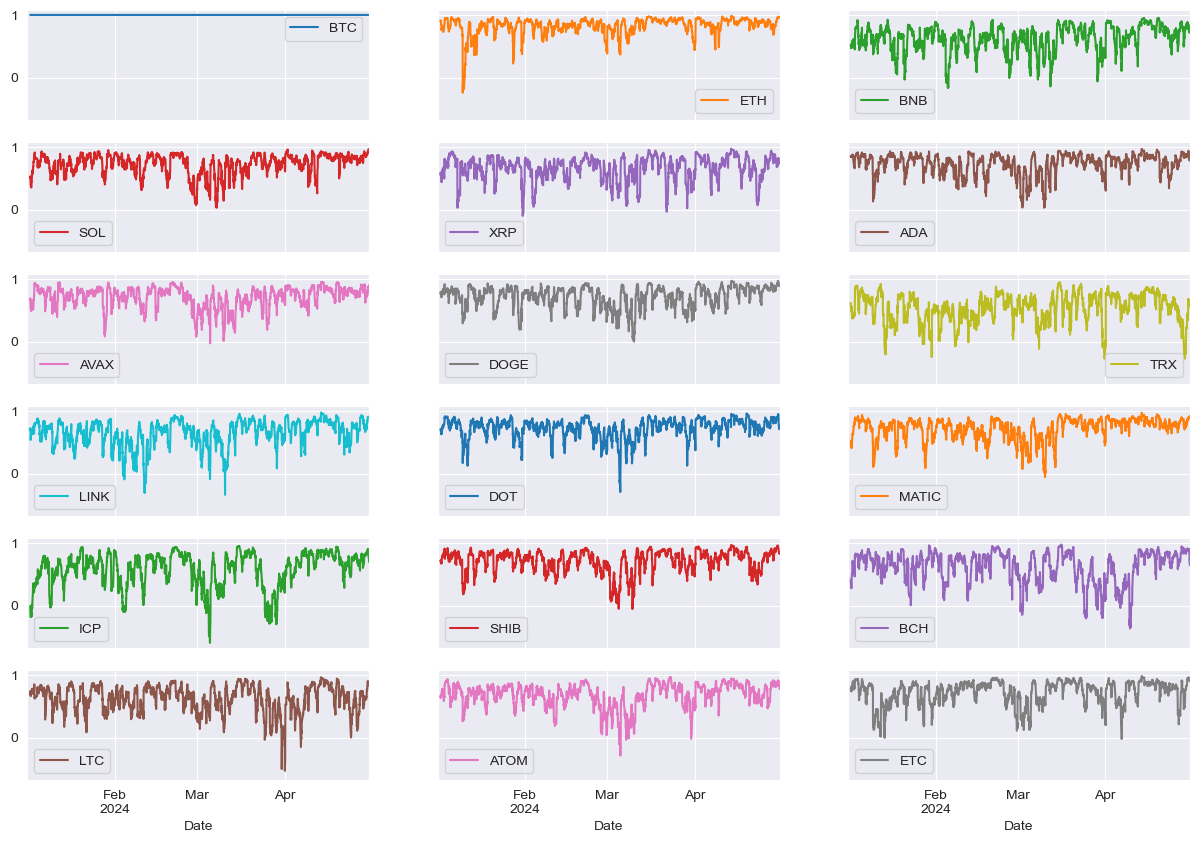

<Figure size 640x480 with 0 Axes>

In [36]:
correlations = returns.rolling(24).corr()
correlations.xs("BTC", level=1).plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(6, 3))
plt.show()
plt.savefig("output/step_02_Daily_Correlations_of_Cryptocurrencies.png")

### Weekly Correlation

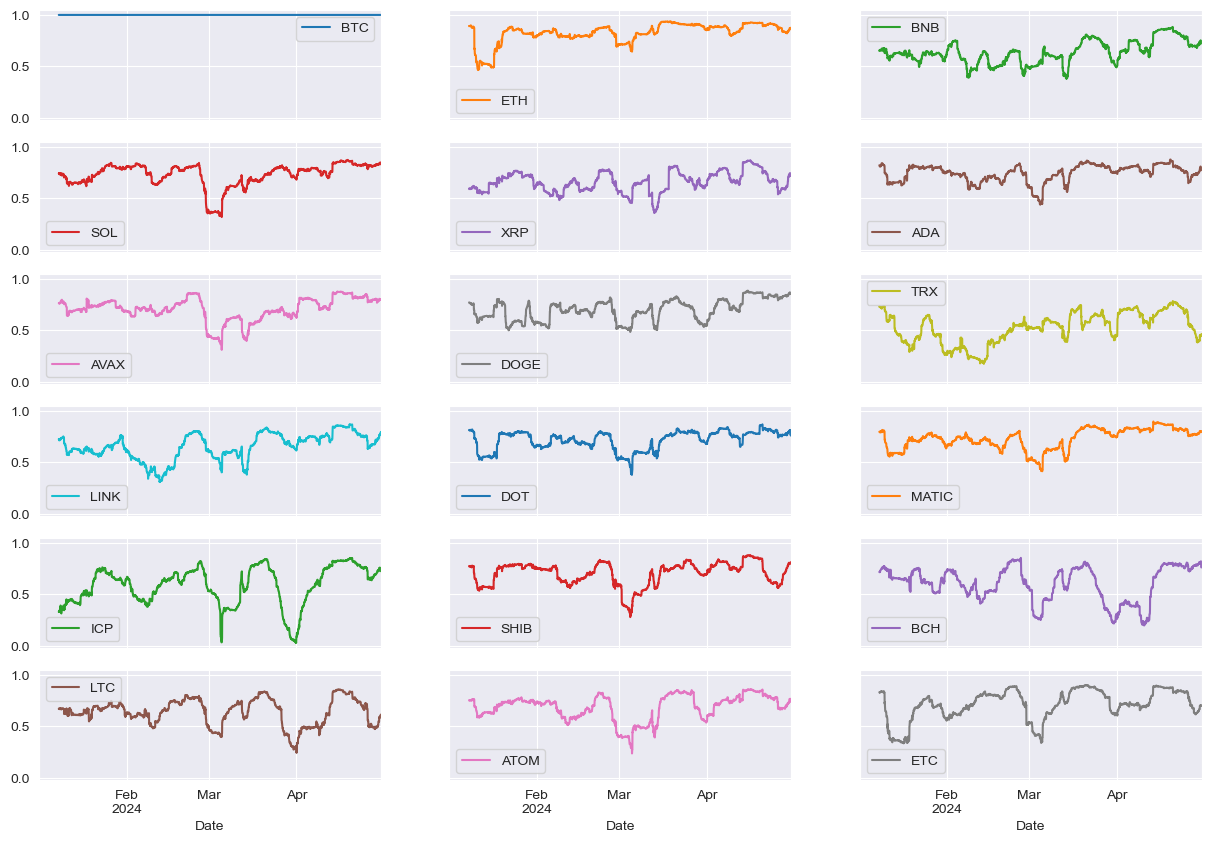

In [37]:
correlations = returns.rolling(7 * 24).corr()
correlations.xs("BTC", level=1).plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(6, 3))
plt.savefig("output/step_02_Weekly_Correlations_of_Cryptocurrencies.png")
plt.show()

### Monthly Correlation

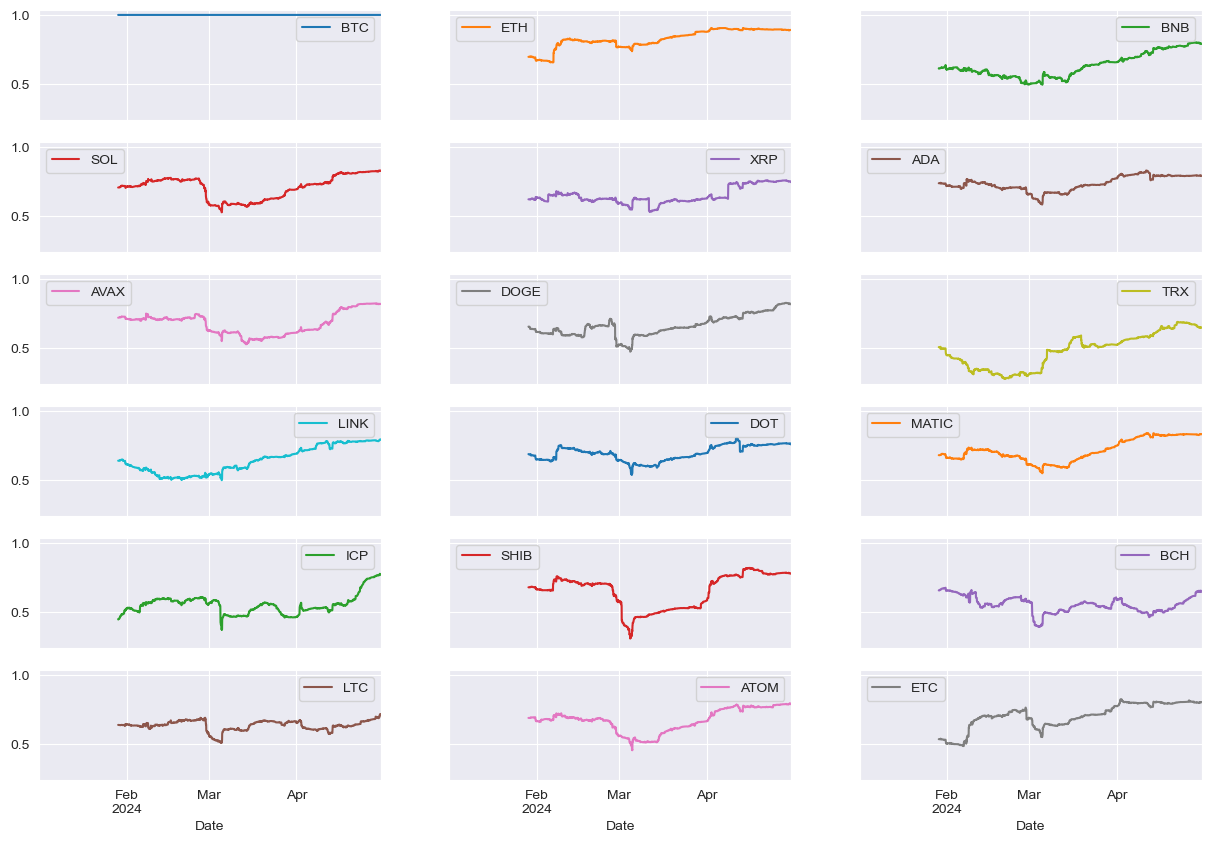

<Figure size 640x480 with 0 Axes>

In [38]:
correlations = returns.rolling(4 * 7 * 24).corr()
correlations.xs("BTC", level=1).plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(6, 3))
plt.show()
plt.savefig("output/step_02_Monthly_Correlations_of_Cryptocurrencies.png")

### Quarterly Correlation

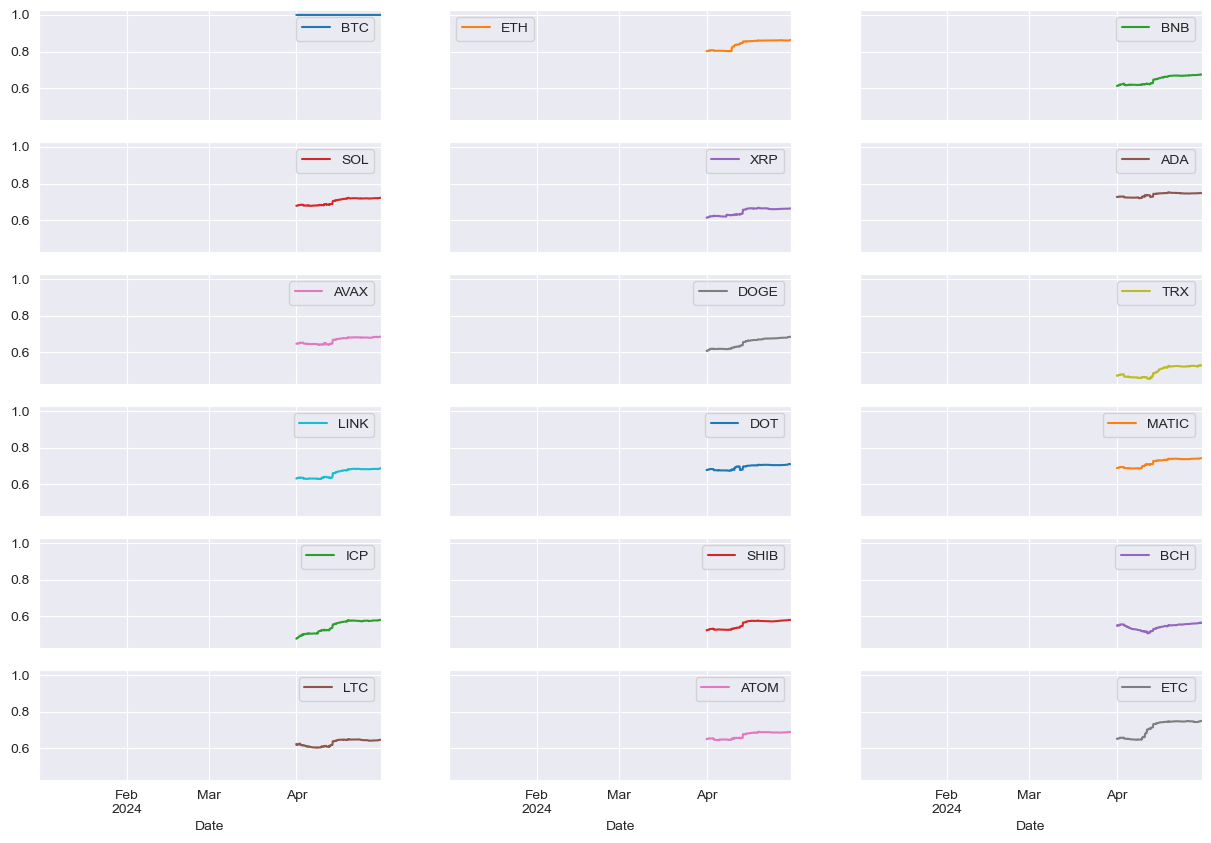

<Figure size 640x480 with 0 Axes>

In [39]:
correlations = returns.rolling(13 * 7 * 24).corr()
correlations.xs("BTC", level=1).plot.line(subplots=True, sharex=True, sharey=True, figsize=(15, 10), layout=(6, 3))
plt.show()
plt.savefig("output/step_02_Quarterly_Correlations_of_Cryptocurrencies.png")

In [40]:
results = returns.corr()
results.to_csv("output/step_02_Correlations_of_Returns.csv")
results

,BTC,ETH,BNB,SOL,XRP,ADA,AVAX,DOGE,TRX,LINK,DOT,MATIC,ICP,SHIB,BCH,LTC,ATOM,ETC
BTC,1.000000,0.829186,0.661239,0.719802,0.654032,0.745335,0.693580,0.664171,0.520288,0.676924,0.702803,0.729137,0.545392,0.574981,0.576781,0.642614,0.688771,0.695295
ETH,0.829186,1.000000,0.707948,0.729434,0.678179,0.787412,0.728840,0.674775,0.560878,0.766385,0.764706,0.825844,0.594320,0.582762,0.575854,0.687004,0.764867,0.799256
BNB,0.661239,0.707948,1.000000,0.632232,0.594346,0.685282,0.634894,0.571048,0.472142,0.650950,0.673791,0.687796,0.533593,0.492160,0.489014,0.594447,0.679511,0.636060
SOL,0.719802,0.729434,0.632232,1.000000,0.637372,0.752300,0.803006,0.589443,0.513987,0.713105,0.738828,0.753387,0.579380,0.491788,0.516891,0.608190,0.736225,0.672620
XRP,0.654032,0.678179,0.594346,0.637372,1.000000,0.770768,0.644586,0.638385,0.479693,0.693460,0.721830,0.712337,0.532760,0.560283,0.555906,0.714353,0.717683,0.677775
ADA,0.745335,0.787412,0.685282,0.752300,0.770768,1.000000,0.776673,0.683793,0.532985,0.789773,0.853556,0.825730,0.633610,0.632572,0.612940,0.732811,0.811564,0.767030
AVAX,0.693580,0.728840,0.634894,0.803006,0.644586,0.776673,1.000000,0.596529,0.518555,0.738220,0.773985,0.773088,0.610783,0.496245,0.545447,0.639385,0.765331,0.685118
DOGE,0.664171,0.674775,0.571048,0.589443,0.638385,0.683793,0.596529,1.000000,0.442539,0.610757,0.645144,0.643730,0.468528,0.794198,0.514251,0.625460,0.625288,0.646489
TRX,0.520288,0.560878,0.472142,0.513987,0.479693,0.532985,0.518555,0.442539,1.000000,0.541251,0.529149,0.555281,0.418480,0.354392,0.398643,0.461122,0.532606,0.505813
LINK,0.676924,0.766385,0.650950,0.713105,0.693460,0.789773,0.738220,0.610757,0.541251,1.000000,0.790236,0.792703,0.619971,0.529603,0.553988,0.684536,0.780090,0.723540


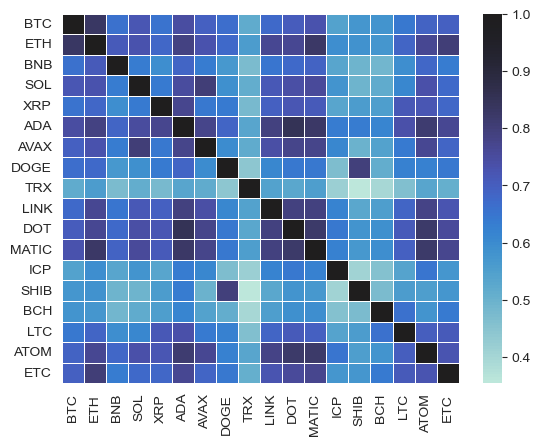

In [41]:
sns.heatmap(returns.corr(), linewidths=0.5, annot=False, center=1)
plt.savefig("output/step_02_Correlations_of_Cryptocurrencies_for_the_whole_period.png", bbox_inches='tight')

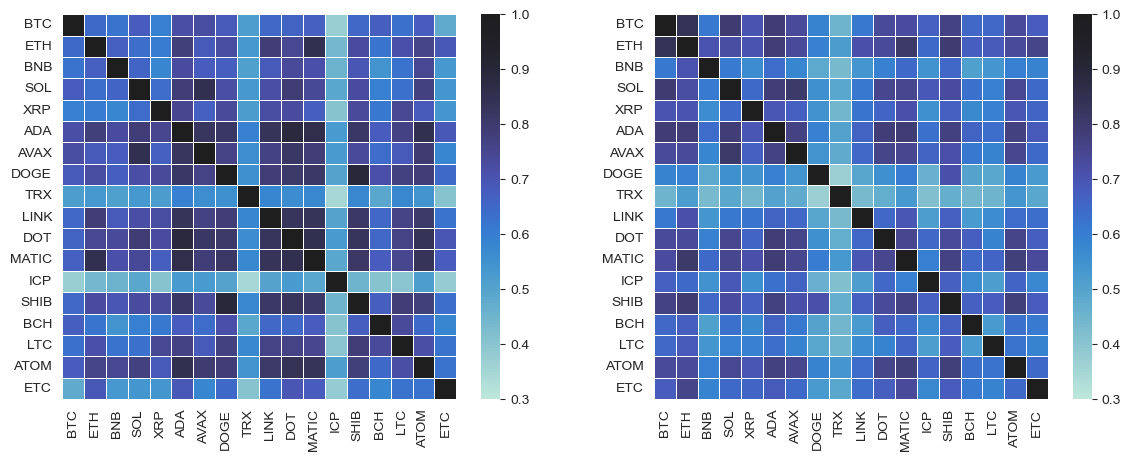

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.heatmap(returns["2024-01-01": "2024-01-15"].corr(), linewidths=0.5, annot=False, center=1, vmin=0.3, ax=axes[0])
sns.heatmap(returns["2024-01-16": "2024-02-01"].corr(), linewidths=0.5, annot=False, center=1, vmin=0.3, ax=axes[1])
plt.savefig("output/step_02_Correlations_of_Cryptocurrencies_in_volatile_period.png", bbox_inches='tight')

# Conditional mean of returns

In [43]:
mean = returns.mean()
mean

BTC      1.410827e-04
ETH      1.183102e-04
BNB      2.369149e-04
SOL      1.425346e-04
XRP     -3.656457e-05
ADA     -5.451085e-05
AVAX     1.338892e-05
DOGE     2.226407e-04
TRX      4.146411e-05
LINK     4.747545e-07
DOT     -3.270136e-05
MATIC   -8.756711e-05
ICP      7.028818e-05
SHIB     3.874884e-04
BCH      2.418195e-04
LTC      6.807473e-05
ATOM    -4.013859e-05
ETC      1.070612e-04
dtype: float64

In [44]:
residuals = returns - mean
residuals

,BTC,ETH,BNB,SOL,XRP,ADA,AVAX,DOGE,TRX,LINK,DOT,MATIC,ICP,SHIB,BCH,LTC,ATOM,ETC
Date,,,,,,,,,,,,,,,,,,
2024-01-01 01:00:00,0.003116,0.003458,0.002626,0.021042,0.003769,0.007414,0.011543,0.003451,-0.001149,0.002975,0.003299,0.008328,-0.011620,0.003466,0.002452,0.003764,0.002284,0.008101
2024-01-01 02:00:00,-0.000903,-0.004763,-0.014192,-0.004272,-0.004976,-0.004594,-0.008899,-0.004216,-0.003646,-0.006726,-0.004911,-0.008388,-0.015918,-0.003267,-0.002544,-0.002522,-0.004530,-0.007796
2024-01-01 03:00:00,-0.006027,-0.008496,-0.005705,-0.006122,-0.003863,-0.006451,-0.013589,-0.006793,-0.006534,-0.008895,-0.012690,-0.015075,-0.012166,-0.009050,-0.006780,-0.006766,-0.009610,-0.008311
2024-01-01 04:00:00,0.001501,0.002406,-0.000237,-0.004508,-0.002247,-0.000449,-0.007804,-0.001456,-0.005363,-0.000737,-0.000949,-0.001979,-0.029816,-0.001358,-0.004500,-0.001995,-0.003271,-0.005162
2024-01-01 05:00:00,-0.004056,-0.001724,-0.001854,-0.009692,-0.004705,-0.005321,-0.002631,-0.001345,-0.002482,0.004222,-0.005496,-0.007160,0.020213,0.000584,-0.005296,-0.004894,-0.001668,-0.005650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-30 19:00:00,-0.018529,-0.016054,-0.007935,-0.009562,-0.001976,-0.006605,-0.014796,-0.010212,-0.001901,-0.009913,-0.007437,-0.011428,-0.010792,-0.014351,0.008668,-0.005671,-0.006826,-0.009638
2024-04-30 20:00:00,0.011086,0.012873,0.016688,0.015300,0.007698,0.016005,0.012491,0.010097,0.006140,0.012417,0.011976,0.010664,-0.002048,0.010576,0.003244,0.010305,0.013995,0.012323
2024-04-30 21:00:00,0.003551,0.006912,0.003230,0.005780,-0.005166,-0.001538,0.002765,0.000988,0.001305,-0.000307,0.005692,0.002969,0.010551,0.008650,-0.003716,0.000692,0.019358,0.003061
